In [82]:
import tensorflow as tf ##pip install tensorflow-gpu
import cv2 #pip install opencv-python
## pip install opencv-contrib-python full package
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [83]:
#img_array = cv2.imread("train/0/Training_3908.jpg")

In [84]:
#img_array.shape

In [85]:
Datadirectory = "train/"  ##training dataset

In [86]:
Classes = ["0","1","2","3","4","5","6"] #list of classes

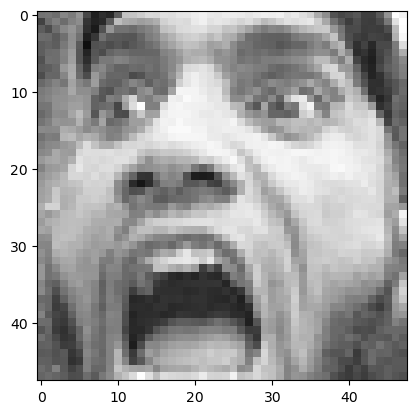

In [87]:
for category in Classes:
    path = os.path.join(Datadirectory, category) ##//
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

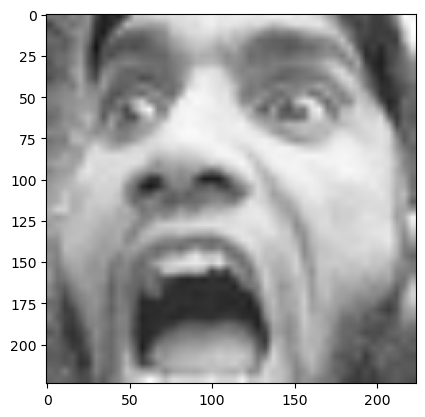

In [88]:
img_size =224 # Imagenet=> 224*224
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [89]:
new_array.shape

(224, 224, 3)

In [90]:
#read all image and convert it to array

In [91]:
training_Data = []## data array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [92]:
create_training_Data()

In [93]:
print(len(training_Data))

1444


In [94]:
import random
random.shuffle(training_Data)

In [95]:
X=[] 
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) #converting it to 4 dimensions


In [96]:
X.shape

(1444, 224, 224, 3)

In [97]:
#
X=X/255.0 #we are normalizing it


In [98]:
type(y)

list

In [99]:
Y=np.array(y)

In [100]:
Y.shape

(1444,)

In [101]:
#deeep learning model transfer learning


In [102]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [103]:
model = tf.keras.applications.MobileNetV2() 

In [104]:
#above is a pretrained model

In [105]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [106]:
#transfer learning- tuning, weights will start from last check point

In [107]:
base_input = model.layers[1].input

In [108]:
base_output = model.layers[-2].output

In [109]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [110]:
final_output = layers.Dense(128)(base_output) #adding new layer, after output of global pooling
final_output = layers.Activation('relu')(final_output) #activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output) #my classes are 07

In [111]:
final_output ##output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_160>

In [112]:
new_model = keras.Model(inputs = base_input, outputs = final_output)


In [113]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [114]:
new_model.compile(loss="sparse_categorical_crossentropy" , optimizer = "adam" , metrics=["accuracy"])

In [115]:
#new_model.fit(X,Y, epochs = 5)

In [116]:
new_model.save('final_face_emotion_detc_model.h5')


In [117]:
new_model_1 = tf.keras.models.load_model('final_face_emotion_detc_model.h5')

In [118]:
frame = cv2.imread("images_444.jpeg")

In [119]:
print(frame)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[184 116   0]
  [195 128  13]
  [187 122  13]
  ...
  [175 112   8]
  [174 119  15]
  [174 119  15]]

 [[169 112  13]
  [184 129  30]
  [167 112  13]
  ...
  [176 116  20]
  [174 119  15]
  [174 119  15]]

 [[169 117  27]
  [166 113  22]
  [158 107  11]
  ...
  [172 119  22]
  [174 119  15]
  [174 119  15]]]


In [120]:
frame.shape

(231, 218, 3)

In [121]:
#we need a face_detection_algorithm
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [122]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [123]:
# to detect multiple images

In [124]:
faces = facecascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = facecascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

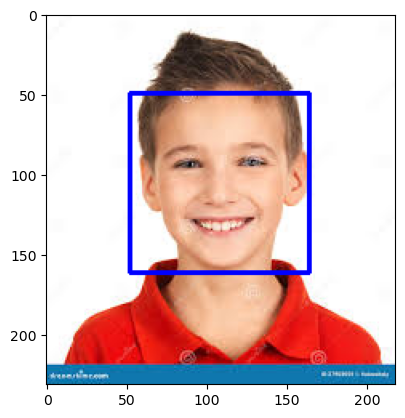

In [125]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

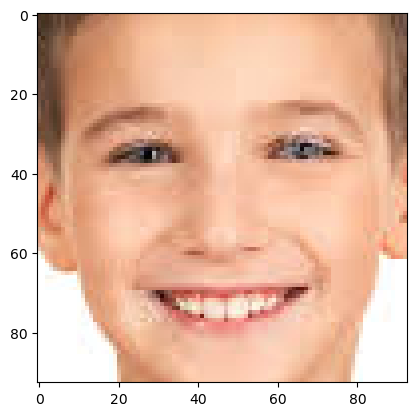

In [126]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [127]:
final_image =cv2.resize(face_roi, (224,224))##
final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
final_image=final_image/255.0 #normalizing

In [128]:
Predictions= new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [129]:
Predictions[0]

array([0.22060733, 0.12279959, 0.11783308, 0.24657245, 0.06969558,
       0.09018421, 0.13230772], dtype=float32)

In [130]:
np.argmax(Predictions)

3

In [131]:
#Realtime Video Demo

In [ ]:
import cv2 
path ="haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#set rectangle background to white
rect_bar = (255,255,255)
img= np.zeros((500,500))#make a black img
text = "Some text in box!"
(text_width,text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] -25
box_coords = ((text_offset_x,text_offset_y),(text_offset_x + text_width + 2,text_offset_y - text_height - 2))
cv2.rectangle(img,box_coords[0],box_coords[1] , cv2.FILLED)
cv2.putText(img, text,(text_offset_x,text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)

#check if web cam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("cannot open webcam")

while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = frame[y:y+h , x:x+w]
        cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]

    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    Predicitons = new_model.predict(final_image)

    font_scale = 1.5
    font =cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions)==0):
        status = "Angry"

        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==1):
        status = "Disgust"

        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==2):
        status = "Fear"

        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==3):
        status = "Happy"

        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==4):
        status = "Sad"

        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==5):
        status = "Surprise"

        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    else:
        status = "Neutral"

        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))





    cv2.imshow("Face emotion recognition",frame)

    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Face not detected
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Face not detected
Face not detected
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Face not detected
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Face not detected
Face